# Visualizing Multiple Data Sets - Part 1: Scatter Plots

As previously mentioned, our first step in working with data sets is typically to gain some basic understanding of the data and relationships among the different data sets using visualizations. In this section, we will start with scatter plots of the data. Then after introducing Summary Statistics in Section XX, we will use these to pool our data before plotting histograms in Section YY. 

Since we will be creating several plots of these data sets, it is convenient to store the values in the appropriate columns of the dataframe as lists or numpy arrays. Here we store the values as numpy arrays to allow us to use some of numpy's built-in methods later in this chapter:

In [136]:
import numpy as np
import pandas as pd
df=pd.read_csv(
 "https://raw.githubusercontent.com/jmshea/intro-data-science-for-engineers/main/03-first-data/covid-merged.csv")
cases=np.array(df["cases"])
pop=np.array(df["population"])
gdp=np.array(df["gdp"])
urban=np.array(df["urban"])



As previously mentioned, we are interested in how socioeconomic factors may be have impacted the spread of Covid-19, which we measure through the number of cases. Thus, every statistical test we will do will be based on the number of cases.

Let's begin with a scatter plot of the number of cases by state (indexed from 0 to 49):

In /Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/lib/python3.7/site-packages/m

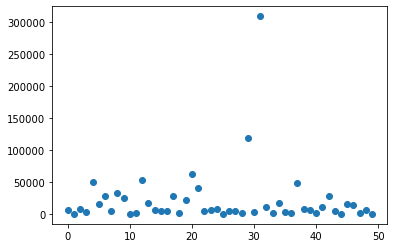

In [4]:
import matplotlib.pyplot as plt

N=50
plt.scatter(range(N), cases)

There are one or two outliers, but this could be caused by the fact that states have different populations.  Let's try to get some understanding of how these two factors seem to interact:

## Scatter Plots for Multiple Datasets

The easiest way to create a with multiple datasets is to simply call Matplotlib's multiple times from within a single cell. Let's try that with our cases and population data:

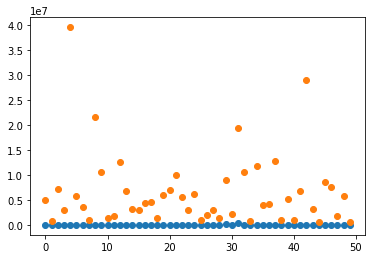

In [58]:
plt.scatter(range(N), cases)
plt.scatter(range(N), pop)

The good news is that Matplotlib knows how to plot multiple data sets on the same plot and automatically picks different colors for the scatter plot markers. We can improve the plot in several ways. First, we can choose a different marker for the population data. Markers can be specified using the `marker` keyword of the scatter function. The value passed is a string that indicates which marker to use. 

Some commonly used marker types include:
```
"."		point
"o"		circle
"s"		square
"+"		plus
"x"		x
```


For a complete list of marker types, consult the Matplotlib documentation:

[matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html)

Let's test this on our plot:

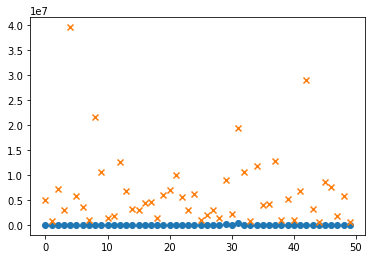

In [80]:
plt.scatter(range(N), cases)
plt.scatter(range(N), pop, marker='x')

Now we can be sure that the orange markers are for the population data -- but someone coming across the graph will not! We can add a legend to convey this information to the viewer. This is most easily done in two steps:
1. When calling `plt.scatter()` for each data set, pass the text that you would like to appear in the legend for that data set using the `label` keyword argument.
2. After all `plt.scatter()` calls are complete, call `plt.legend()` to draw the legend.



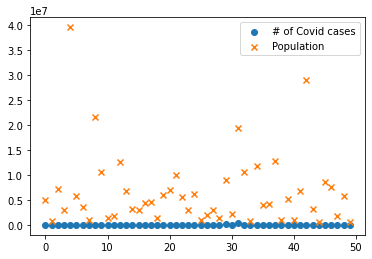

In [83]:
plt.scatter(range(N), cases, label="# of Covid cases")
plt.scatter(range(N), pop, marker='x', label="Population")

plt.legend()

Adding some axis labels finishes the graph:

Text(0, 0.5, 'Number of People/Cases')

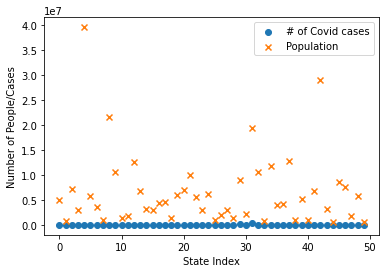

In [84]:
plt.scatter(range(N), cases, label="# of Covid cases")
plt.scatter(range(N), pop, marker='x', label="Population")

plt.legend()
plt.xlabel("State Index")
plt.ylabel("Number of People/Cases")

The bad news is that this graph is not very useful because the variations in the number of cases cannot be discriminated because the range of the number cases is so much smaller than the range of the populations. The NumPy array variables (technically type `np.ndarray`) have a max method that we can use to check this:

In [85]:
cases.max(), pop.max()

(309696, 39512223)

We can better plot these data on the same plot if we use a different $y$-axis for each data set. To do this, we can use Matplotlib's `subplots` function to create a figure and a first axis, and then the `twinx` function to share the **same** $x$-axis but allow a new $y$-axis to be created for the second data set:

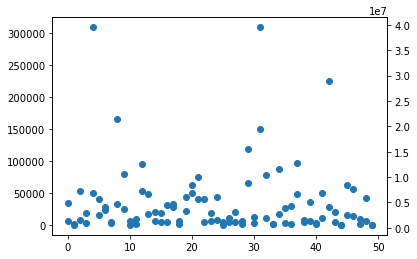

In [86]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)

ax2=ax.twinx()
ax2.scatter(range(N), pop)

However, when we create the second set of axes, we lose the differentiation of markers. We can specify the marker color and type of marker symbol used using the `color` and `marker` keywords respectively. 

For example,

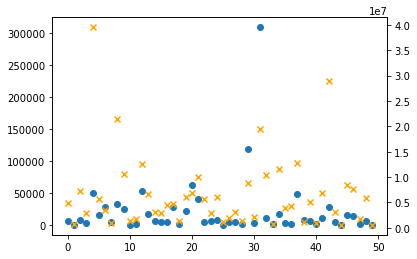

In [88]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)

ax2=ax.twinx()
ax2.scatter(range(N), pop, color='orange', marker='x')

We can add axis labels to each $y$-axis separately. However, because we are using different axes, we need to use the `set_xlabel` and `set_ylabel` methods of the Matplotlib `axis` object to set these labels:


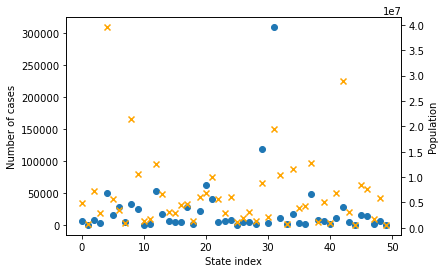

In [104]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases)
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2=ax.twinx()
ax2.scatter(range(N), pop, color='orange', marker='x')
ax2.set_ylabel("Population");



It is easiest to add separate legends for the different data sets, but we need to specify different locations for the legends so that they do not overlap:

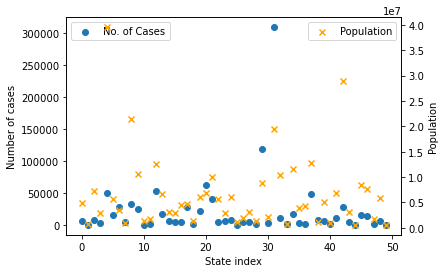

In [111]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases, label='No. of Cases')
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2=ax.twinx()

ax2.scatter(range(N), pop, color='orange', marker='x', label='Population')
ax2.set_ylabel("Population");

ax.legend()
ax2.legend(loc=2);



We can make a couple of quick fixes to this. First, let's swap the two legends, so that the legend is close to its corresponding $y$-axis. Second, We note that one of the Population points is behind the left legend, and one of the cases points is above the legend. Let's adjust the $y$-limits of these axes so that those points will be lower in the graph:

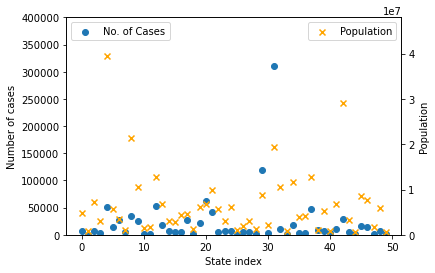

In [118]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases, label='No. of Cases')
ax.set_ylabel("Number of cases")
ax.set_xlabel("State index")

ax2=ax.twinx()

ax2.scatter(range(N), pop, color='orange', marker='x', label='Population')
ax2.set_ylabel("Population");

ax.legend(loc=2)
ax2.legend();

ax.set_ylim(0,4e5);
ax2.set_ylim(0,4.8e7);



Another common convention is to plot the values in thousands or millions to clean up the axes labels, as shown here:

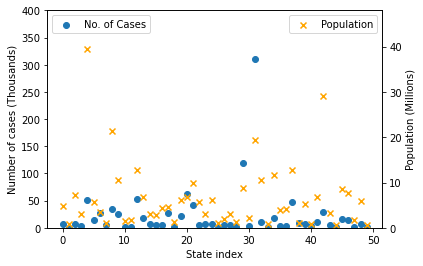

In [120]:
fig, ax = plt.subplots()
ax.scatter(range(N), cases/1000, label='No. of Cases')
ax.set_ylabel("Number of cases (Thousands)")
ax.set_xlabel("State index")

ax2=ax.twinx()

ax2.scatter(range(N), pop/1e6, color='orange', marker='x', label='Population')
ax2.set_ylabel("Population (Millions)");

ax.legend(loc=2)
ax2.legend();

ax.set_ylim(0,4e2);
ax2.set_ylim(0,48);

The relation among these data might be more clear if the data were sorted by population. We can sort the rows of the dataframe by population as follows:

In [122]:
df.sort_values("population", inplace=True)

In [123]:
popS=np.array(df["population"])
casesS=np.array(df["cases"])

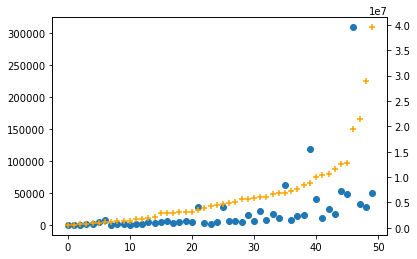

In [124]:
fig, ax = plt.subplots()
ax.scatter(range(N), casesS)

ax2=ax.twinx()
ax2.scatter(range(N), popS, color="orange", marker="+")

The number of cases (shown in blue) generally increases with the population of the states. We might make some guesses about how these two variables might be related. Statisticians call such guesses *hypotheses* if they can be formulated as something that can be tested from the data. Two possible hypotheses about how population of a state might affect the number of cases are:
* Each person in the United States has the same probability of getting Covid. Thus, the number of cases per state should increase in proportion to the state's population.
* The probability of getting Covid increases with the population of a state because there is an increase amoung of mixing among the people within the state. Then the number of cases per state should increase with population even faster than under the previous assumption.

Of course, there may be many other hypotheses that explain this relationship. In this chapter, we will try to remove some of the underlying effects of different state populations by normalizing the cases and GDP on a per population basis. 

Let's look at how we would do this within our Pandas dataframe. We can create a new column of our dataframe by simply assigning to it. Here, we just use functions of our other dataframe columns:

In [126]:
df["cases_pp"]=df["cases"]/df["population"]
df

,state,cases,population,gdp,urban,cases_pp,gdp_pp
49,Wyoming,559,578759,40764.3,64.76,0.000966,0.070434
44,Vermont,866,623989,34320.2,38.90,0.001388,0.055001
1,Alaska,353,731545,54674.7,66.02,0.000483,0.074739
33,North Dakota,1067,762062,57471.9,59.90,0.001400,0.075416
40,South Dakota,2450,884659,56051.9,56.65,0.002769,0.063360
7,Delaware,4734,973764,77879.4,83.30,0.004862,0.079978
38,Rhode Island,8621,1059361,62335.4,90.73,0.008138,0.058842
25,Montana,452,1068778,54034.7,55.89,0.000423,0.050557
18,Maine,1095,1344212,68984.9,38.66,0.000815,0.051320
28,New Hampshire,2146,1359711,88014.8,60.30,0.001578,0.064731


In [127]:
df["gdp_pp"]=df["gdp"]/df["population"]

As before, we create Numpy arrays of these variables for convenience:

In [128]:
cases_pp=np.array(df["cases_pp"])
gdp_pp=np.array(df["gdp_pp"])

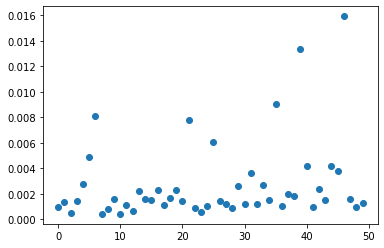

In [129]:
plt.scatter(range(N), cases_pp)

Even with this adjustment, we see that there are some states that have Covid cases/population that are very different than most of the other states. These may be considered *outliers*:


````{panels}
DEFINTION
^^^
outlier
: A value in a dataset that takes on a value that is not reasonable, based on the other values in the dataset or other domain knowledge. Outliers are often due to data entry, measurement, or unit conversion errors.
````

One of the reasons to start data visualization with scatter plots is that unlike histograms, they show the whole data and are helpful in spotting outliers.

If you followed the spread of Covid in the United States in spring 2020, you can probably guess which states have these extreme values.

Let's re-sort the data frame based on our new Covid-cases per population column, and we will pass it the keyword argument `ascending=False` to put the highest cases per population first:

In [135]:
df.sort_values("cases_pp", inplace=True, ascending=False)
df

,state,cases,population,gdp,urban,cases_pp,gdp_pp
31,New York,309696,19453561,1791566.8,87.87,0.015920,0.092095
29,New Jersey,118652,8882190,642967.7,94.68,0.013358,0.072388
20,Massachusetts,62205,6892503,603209.6,91.97,0.009025,0.087517
38,Rhode Island,8621,1059361,62335.4,90.73,0.008138,0.058842
6,Connecticut,27700,3565287,290703.0,87.99,0.007769,0.081537
17,Louisiana,28044,4648794,259079.3,73.19,0.006033,0.055730
7,Delaware,4734,973764,77879.4,83.30,0.004862,0.079978
12,Illinois,52918,12671821,893355.5,88.49,0.004176,0.070499
21,Michigan,41348,9986857,543489.4,74.57,0.004140,0.054420
37,Pennsylvania,48224,12801989,818448.6,78.66,0.003767,0.063931


The top to states in terms of both raw cases and cases per person are New York and New Jersey, with Covid rates per population over 0.013, whereas other states rates were all below 0.01.

In this case, we know that these states had a very rapid early spread of Covid in comparison to other states, so these data points are probably the true values and would *not* be considered outliers.

## Pooling Data to Create Binary Comparisons

In this chapter, we will conduct our first binary hypothesis tests. Here, binary does not refer to 0 and 1, but to the fact that we will consider data from two different *classes*, or groups. We will evaluate a single variable and determine whether the data in different classes is different in some characteristic. 

To be specific, we are going to look at the Covid cases per population variable and determine whether the following classes affect this variable:
* *High population vs Low population*: We will split the states into two classes based on population.
* *Higher GDP vs Lower GDP*: We will split the states into two classes based on GDP per population.
* *Urban vs Rural*: We will split the states into two classes based on what percentage of the state lives in a rural area.

## Histograms for Multiple Datasets

As with the data in Chapter XX, we next want to study the rates of occurrence of the values of the data. We start with the

However, unlike the histograms we previously generated, this data takes on **real values**, not just integers. One implication of this is that we cannot meaningfully count the data (for instance to compute the relative frequencies):

In [48]:
np.unique(rate2005, return_counts=True)

(array([ 3.4,  3.6,  5.2,  5.3,  6.6,  6.7,  6.8,  7. ,  7.7,  7.8,  8. ,
         8.5,  8.8,  9.3,  9.5,  9.6, 10. , 10.1, 10.2, 10.7, 10.8, 11.1,
        11.2, 11.5, 11.6, 11.9, 12.1, 12.8, 12.9, 13. , 13.2, 13.4, 13.8,
        13.9, 14.1, 15.7, 16. , 16.1, 16.9, 17.5, 18.5, 30. ]),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1]))

There is exactly one occurrence of most (36) of the values. If the mortality rates were calculated to more than one decimal place, it is likely that all of the values would be distinct. Yet we can see that the values are not evenly distributed: there are only two values in the range $[3,5)$, but there are ten values in the range $[10,12)$.

The `plt.hist()` function is designed to generate meaningful histograms for continuous data by counting the number of occurrences per bin:

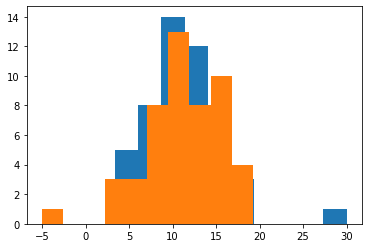

In [49]:
plt.hist(rate2005)
plt.hist(rate2014);

Each bar of the histgram represents a "bin" of data values. In fact, the counts and bin edges are returned by the hist function:

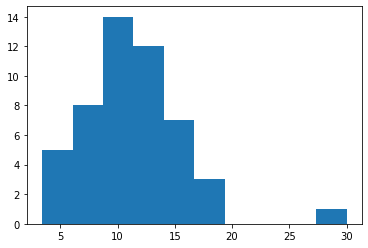

In [50]:
counts, bins, _ =plt.hist(rate2005)

Note that here I used a Python convention of storing the matplotlib patches information, which is the third returned value, in the variable "_" (underscore) to indicate that it is a value that we do not care about.

We can inspect the bins and counts by evaluating those variables or printing them:

In [51]:
print("Bins:", bins)
print("Counts:", counts)

Bins: [ 3.4   6.06  8.72 11.38 14.04 16.7  19.36 22.02 24.68 27.34 30.  ]
Counts: [ 5.  8. 14. 12.  7.  3.  0.  0.  0.  1.]


Some styling will help make this more legible. The `alpha` keyword parameter in matplotlib sets the transparency (from totally transparent (`alpha=0`) to totally opaque (`alpha=1`). Adding transparency makes it much easier to see the data in both histograms:

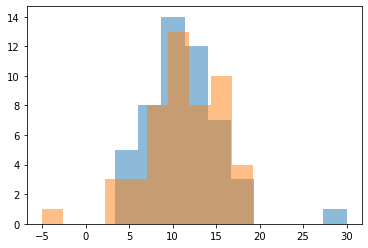

In [52]:
plt.hist(rate2005,alpha=0.5)
plt.hist(rate2014,alpha=0.5);

The choice of `alpha = 0.5` is usually a good starting point, but the best value to use is up to the graph's creator. 



#### Choosing the number/size of histogram bins

Unlike integer data, when the data comes from the continuous real line, there is no right way to choose the size or number of the histogram bins.

We can easily change the number of bins to provide more resolution into the data; however if we increase the number of bins, the number of data points per bin will be lower. 

If we just want to specify a number of bins (instead of a list of bin edges, like in the previous chapter), then we can just pass number of bins to the `bins` keyword argument:

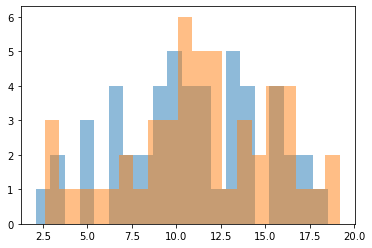

In [83]:
plt.hist(rate2005,alpha=0.5,bins=20)
plt.hist(rate2014,alpha=0.5,bins=20);

If we increase the number of bins too much, we will run into a similar problem we had in counting using `np.unique()`: most of the bins will have either 1 or 0 values in them:

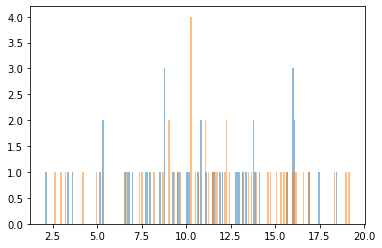

In [84]:
plt.hist(rate2005,alpha=0.5,bins=200)
plt.hist(rate2014,alpha=0.5,bins=200);

Thus the number of bins should be chosen to balance between providing more resolution versus having sufficiently high counts in the bins to see how the values are distributed. Selecting the number of bins to achieve an appropriate balance is up to the graph creator. There are some research papers that provide techniques to select the number of bins; however, they are beyond the scope of this book. 

If you need a guidline for selecting the number of histogram bins, you can try:

**Make the number of bins as large as possible while ensuring that  at least 50% of the bins contain at least 2 data points.**

#### Bin alignment for multiple histograms in one figure

One issue that arises when plotting multiple histograms in one figure is that the bins created by each call to `plt.hist()` are not aligned. This can be helpful in that the bins are typically offset from each other, which makes it easier to see the separate bar heights. However, the bar heights cannot be directly compared because they correspond to different ranges of data. There are various solutions, but let's use `numpy` to create our own set of bin edges. Start by finding the min and max of each data set:

In [73]:
print(np.min(rate2005), np.min(rate2014))
print(np.max(rate2005), np.max(rate2014))

2.1 2.6
18.5 19.2


Now we can make a linearly spaced set of bin edges from the minimum to the maximum values using NumPy's `linspace()` function. It is usually called with three arguments: start, stop, number of points:

In [76]:
bin_edges=np.linspace(2.1, 19.2, 20)
print(bin_edges)

[ 2.1  3.   3.9  4.8  5.7  6.6  7.5  8.4  9.3 10.2 11.1 12.  12.9 13.8
 14.7 15.6 16.5 17.4 18.3 19.2]


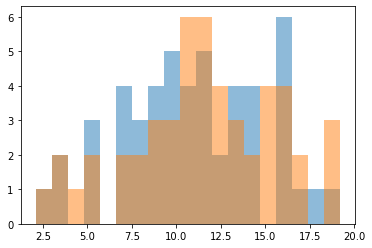

In [77]:
plt.hist(rate2005,alpha=0.5,bins=bin_edges,label="2005")
plt.hist(rate2014,alpha=0.5,bins=bin_edges,label="2014");

Now we can finish the graph by providing data labels and adding a legend and axis labels. In this case, we might omit a title because the title would probably be something like "Mortality Rate Histograms for 2005 and 2014", which can already be determined from inspecting the graph.

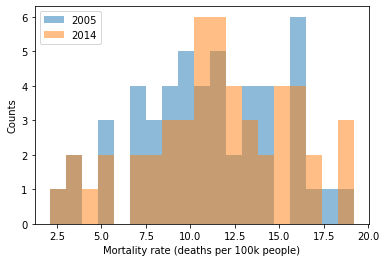

In [78]:
plt.hist(rate2005,alpha=0.5,bins=bin_edges,label="2005")
plt.hist(rate2014,alpha=0.5,bins=bin_edges,label="2014");
plt.legend()
plt.xlabel("Mortality rate (deaths per 100k people)")
plt.ylabel("Counts");

What inferences might you make from this plot?

A quick visual inspect should indicate that the two data sets are quite similar. However, we can see that the in from 5 to 10, the 2005 data set has higher counts, while in the bins from 10 to 19.2, the 2014 data set has more bins with a higher count.

The histogram gives us some insight into how these data sets might be similar or different, but they do not give us a way to perform a quantitative comparison or to determine if any observed difference is likely to have come from real differences in the underlying data sets or could just be attributed to randomness. To resolve both these issues, we can compute values that capture some summary information about the data set. We call these values **summary statistics**: